<a href="https://colab.research.google.com/github/sebasruggero/TextAnalytics/blob/main/Milei_SpeechToText_Statics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Lic. Sebastian Ruggero
#### Tema de Análisis: Speech to Text and Text Analytics




<h1>Este trabajo tiene como objetivo aplicar tecnicas de analisis estadisticos para realizar Text Analytics</h1>

## [Text Mining Infrastructure in R](https://www.researchgate.net/publication/26539008_Text_Mining_Infrastructure_in_R)

## [Using Text Mining Techniques for Extracting Information from Research Articles](https://www.researchgate.net/publication/321150349_Using_Text_Mining_Techniques_for_Extracting_Information_from_Research_Articles)

## [Text Mining: Approaches and Applications](https://www.researchgate.net/publication/265568331_Text_Mining_Approaches_and_Applications)

## [Text as Data](https://web.stanford.edu/~gentzkow/research/text-as-data.pdf)





<h2>El algoritmo incluye los siguietes pasos:</h2>

### Preparacion del entorno para realizar el analisis utilizando lenguaje R

 1. Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)

 2. Instalacion y carga de librerias restantes

 3. Conversion de audio a texto mediante el uso de la API

4. Carga de datos

5. Sentimientos: Analisis y Visualización

6. Limpieza de texto

  6.1 Conversión de texto a minusculas

  6.2  Eliminar palabras vacías

7. Nube de Palabras

8. Frecuencia de Palabras

9. Biagramas: Analisis y Visualizacion

10. Detección de temas

11. Grafico de Rede de palabras





 1. Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)



In [ ]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg
!pip install webvtt-py


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 2. Instalacion y carga de librerias restantes


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import webvtt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
nltk.download('all')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

 3. Conversion de audio a texto mediante el uso de la API


In [ ]:
!whisper "/content/drive/Othercomputers/My Laptop/DataScience/SpeechToText/milei.mp3" --model small

4. Carga de datos desde el drive

In [8]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/milei.vtt')  # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Crear una lista de diccionarios para almacenar los datos de los subtítulos
data = []
for subtitulo in subtitulos:
    data.append({'time': subtitulo.start, 'subtitulo': subtitulo.text})

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar DataFrame
print(df)

            time                                          subtitulo
0   00:00:00.000  A ver, Argentina no es que no crece desde ahor...
1   00:00:04.200  hacia este gobierno y, digamos, me parece espa...
2   00:00:07.000  Pero el problema del crecimiento argentino no ...
3   00:00:09.000              A ver, Argentina no crece desde 2011.
4   00:00:12.000      En ese lapso, 2011-2018, el mundo creció 34%.
..           ...                                                ...
89  00:03:22.000     Cuando eliminase la posibilidad de la corrida,
90  00:03:24.000            ya no necesitas tener el Banco Central.
91  00:03:26.000     El fundamento para que exista un Banco Central
92  00:03:28.000  es para que se apresta a mí este último instan...
93  00:03:30.000  Si eliminase el problema, no tenemos más probl...

[94 rows x 2 columns]


In [ ]:
df ['start_date'] = pd. to_datetime (df ​​['date'], format = ' % Y% m% d ')

5. Sentimientos: Analisis y Visualización


In [9]:
# Cargamos las librerias
from nltk.sentiment import SentimentIntensityAnalyzer

In [10]:
sia = SentimentIntensityAnalyzer()
df['Puntaje_sentimiento'] = df['subtitulo'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [21]:
import pandas as pd
import plotly.express as px

# Procesamiento de la columna 'time' para convertirla a segundos
df['time_seconds'] = df['time'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second + t.microsecond / 1e6)

# Define una función para asignar colores según el tipo de sentimiento
def assign_color(puntaje):
    if puntaje > 0:
        return 'green'  # Positivo - verde
    elif puntaje < 0:
        return 'red'  # Negativo - rojo
    else:
        return 'yellow'  # Neutro - amarillo

# Agrega una nueva columna al DataFrame con el color según el tipo de sentimiento
df['Color_sentimiento'] = df['Puntaje_sentimiento'].apply(assign_color)

# Crea el gráfico de dispersión
fig = px.scatter(df, x='time_seconds', y='Puntaje_sentimiento', color='Color_sentimiento', text=None,
                 title='Análisis de Sentimiento a lo largo del tiempo')

# Ajusta el rango del eje x
fig.update_xaxes(range=[0, df['time_seconds'].max()])

# Formatea el eje x para mostrar el formato MM:SS
fig.update_layout(xaxis_tickformat='%M:%S')

# Personaliza la apariencia del gráfico
fig.update_traces(textposition='top center')

# Muestra el gráfico
fig.show()

In [22]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/milei.vtt')   # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Obtener texto plano sin los tiempos de los subtítulos
texto_plano = '\n'.join(subtitulo.text for subtitulo in subtitulos)

# Mostrar texto plano
print(texto_plano)

A ver, Argentina no es que no crece desde ahora, o sea, yo tengo todas las críticas
hacia este gobierno y, digamos, me parece espantoso, ¿sí?
Pero el problema del crecimiento argentino no viene a hoy.
A ver, Argentina no crece desde 2011.
En ese lapso, 2011-2018, el mundo creció 34%.
Los países desarrollados 17 y los emergentes 45, no son nada.
¿Y cuál es su propuesta?
Mi propuesta, básicamente lo que hay que hacer es una reforma del Estado.
Esto lo estamos publicando el mes que viene con Diego Yacomini.
Básicamente consta en bajar 15 puntos el gasto público
para bajar 10 puntos la presión fiscal,
quitar presión sobre la esferta de la economía
para que la economía vuelva a crecer
y, en el plano monetario, para eliminar la inflación directamente,
hacer volar el Banco Central.
Gasto público es una categoría grande.
¿De dónde sacas, puntualmente?
¿Perdón? ¿Hacer volar el Banco Central qué significa?
Eliminarlo.
¿Hay algún país desarrollado que no tenga Banco Central?
La pregunta es, a ver

6. Limpieza de texto

  6.1 Conversión de texto a minusculas

  6.2  Eliminar palabras vacías



In [23]:
# Pasamos el texto a minusculas
texto_minusculas = texto_plano.lower()

# Definimos las stopwords en el idioma correspondiente
stopwords_es = set(stopwords.words('spanish'))

# Eliminar palabras vacías
stopwords_es = stopwords.words('spanish')
palabras_a_eliminar = [",", "que", "y", "otras", "¿", "?", ".", "...", "si","vos", "entonces", "va", "ver", "digamos"]

# Tokenización del texto
palabras = nltk.word_tokenize(texto_minusculas)

# Eliminacion de stopwords
texto_sin_stopwords = [palabra for palabra in palabras if palabra.lower() not in stopwords_es and palabra not in palabras_a_eliminar]



In [24]:
texto_procesado = ' '. join(texto_sin_stopwords)

In [25]:
texto_procesado

'argentina crece ahora todas críticas hacia gobierno parece espantoso ¿sí problema crecimiento argentino viene hoy argentina crece 2011. lapso 2011-2018 mundo creció 34 % países desarrollados 17 emergentes 45 ¿y cuál propuesta propuesta básicamente hacer reforma publicando mes viene diego yacomini básicamente consta bajar 15 puntos gasto público bajar 10 puntos presión fiscal quitar presión esferta economía economía vuelva crecer plano monetario eliminar inflación directamente hacer volar banco central gasto público categoría grande ¿de dónde sacas puntualmente ¿perdón ¿hacer volar banco central significa eliminarlo ¿hay algún país desarrollado banco central pregunta ¿cómo historia banco central argentina argentina banco central 1935. cajero argentina banco central acá ¿cuánto inflación 3 % después banco central mixto bueno 1935 existía control remoto ¿no bien existía televisión dinero invento privado dinero pasó manos políticos convirtió mecanismo estafa argentina gratis tener banco c

7. Nube de Palabras



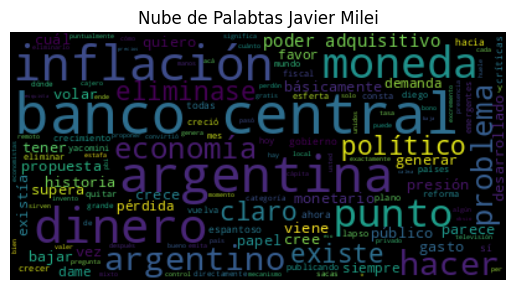

In [26]:
wordcloud = WordCloud().generate(texto_procesado)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabtas Javier Milei')
plt.show()

In [27]:
# Tokenización de palabras

from nltk.tokenize import word_tokenize
from nltk.text import Text

text = texto_procesado
tokens = word_tokenize(text.lower())

# Creación del objeto Text de NLTK
text_obj = Text(tokens)

# Análisis de concordancia
term = "Argentina"
concordance = text_obj.concordance_list(term, width=50)

# Imprimir concordancia
for entry in concordance:
    print(entry.line)
    print('')

 argentina crece ahora todas c

argentino viene hoy argentina crece 2011. lapso 2

toria banco central argentina argentina banco cen

o central argentina argentina banco central 1935.

entral 1935. cajero argentina banco central acá ¿

ió mecanismo estafa argentina gratis tener banco 

encia banco central argentina pbi per cápita unid

ee momento historia argentina genera economistas 

oneda existe moneda argentina claro toleriza econ

ulan dólares moneda argentina terminar siendo dól



9. Biagramas: Analisis y Visualizacion


In [28]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Tokenización de palabras
text = texto_procesado

tokens = word_tokenize(text.lower())

# Creación de bigramas (pares de palabras)
bigrams = list(ngrams(tokens, 2))

# Conteo de co-ocurrencia de bigramas
co_ocurrence_counts = Counter(bigrams)

# Imprimir los bigramas más frecuentes
for bigram, count in co_ocurrence_counts.most_common(10):
    print(bigram, count)


('banco', 'central') 13
('poder', 'adquisitivo') 3
('adquisitivo', 'dinero') 3
('argentina', 'crece') 2
('gasto', 'público') 2
('volar', 'banco') 2
('central', 'argentina') 2
('argentina', 'banco') 2
('tener', 'banco') 2
('papel', 'moneda') 2


In [29]:
import plotly.express as px
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Tu código para tokenización y conteo de bigramas aquí

# Crear un DataFrame a partir del contador de co-ocurrencia
data = {'Bigram': [' '.join(bigram) for bigram, _ in co_ocurrence_counts.most_common(10)],
        'Count': [count for _, count in co_ocurrence_counts.most_common(10)]}

df = pd.DataFrame(data)

# Graficar el diagrama de bigramas
fig = px.bar(df, x='Bigram', y='Count', title='Diagrama de Bigramas más Frecuentes')
fig.show()